<a href="https://colab.research.google.com/github/sboonpan/Project_SET50_DMLP/blob/main/Project_SET50_DMLP_ADVANCE_Adj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [745]:
!pip install talib-binary
!pip install yfinance

In [746]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import talib as ta
import warnings

import random
import seaborn as sns
import matplotlib as mpl
sns.set_style('whitegrid')


warnings.simplefilter("ignore")
%matplotlib inline

# Data Preparation

## Raw Data

https://marketdata.set.or.th/mkt/sectorquotation.do?language=th&country=TH&market=SET&sector=SET50

In [747]:
symbollist = pd.read_html('https://marketdata.set.or.th/mkt/sectorquotation.do?language=th&country=TH&market=SET&sector=SET50')[2]
symbollist.iloc[:,0]

0     ADVANC
1        AOT
2        AWC
3      BANPU
4        BBL
5       BDMS
6        BEM
7      BGRIM
8         BH
9        BTS
10       CBG
11      COM7
12     CPALL
13       CPF
14       CPN
15       CRC
16      DTAC
17        EA
18      EGCO
19    GLOBAL
20      GPSC
21      GULF
22     HMPRO
23    INTUCH
24      IRPC
25       IVL
26     KBANK
27       KCE
28       KTB
29       KTC
30        LH
31      MINT
32       MTC
33        OR
34       OSP
35       PTT
36     PTTEP
37     PTTGC
38     RATCH
39     SAWAD
40       SCB
41       SCC
42      SCGP
43      STGT
44    TIDLOR
45     TISCO
46       TOP
47      TRUE
48       TTB
49        TU
Name: หลักทรัพย์, dtype: object

In [748]:
symbol = 'ADVANC.BK'
start  = '2011-01-03'
end    = '2021-12-31'

In [749]:
asset = yf.download(symbol, start, end) 
asset

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-04,85.50,87.50,85.00,86.00,50.104332,5691700
2011-01-05,86.50,87.50,86.50,87.25,50.832588,4366500
2011-01-06,87.00,87.25,86.25,87.25,50.832588,3562200
2011-01-07,86.75,86.75,85.25,86.00,50.104332,3651300
2011-01-10,85.50,85.75,84.00,84.75,49.376045,3966900
...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,2762800
2021-12-27,224.00,226.00,222.00,223.00,223.000000,2884100
2021-12-28,224.00,229.00,223.00,225.00,225.000000,5460600


In [750]:
df= asset.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2682 entries, 2011-01-04 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2682 non-null   float64
 1   High       2682 non-null   float64
 2   Low        2682 non-null   float64
 3   Close      2682 non-null   float64
 4   Adj Close  2682 non-null   float64
 5   Volume     2682 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 146.7 KB


In [751]:
#df.drop(columns = ['Volume'], inplace = True)
#df

In [752]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [753]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2.682000e+03
mean,191.700410,193.655295,189.739094,191.654642,153.709547,6.920985e+06
std,39.972511,40.508508,39.335602,39.911727,37.020649,5.359363e+06
min,77.500000,80.000000,77.000000,79.000000,46.026058,0.000000e+00
25%,172.000000,174.000000,171.000000,172.500000,135.673294,3.977150e+06
50%,192.000000,193.500000,190.000000,192.000000,164.723526,5.660100e+06
75%,216.750000,219.000000,214.000000,216.000000,178.271664,8.087450e+06
max,308.000000,311.000000,303.000000,310.000000,230.000000,9.475180e+07


In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2682 entries, 2011-01-04 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2682 non-null   float64
 1   High       2682 non-null   float64
 2   Low        2682 non-null   float64
 3   Close      2682 non-null   float64
 4   Adj Close  2682 non-null   float64
 5   Volume     2682 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 146.7 KB


# Data Preparation

In [755]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-04,85.50,87.50,85.00,86.00,50.104332,5691700
2011-01-05,86.50,87.50,86.50,87.25,50.832588,4366500
2011-01-06,87.00,87.25,86.25,87.25,50.832588,3562200
2011-01-07,86.75,86.75,85.25,86.00,50.104332,3651300
2011-01-10,85.50,85.75,84.00,84.75,49.376045,3966900
...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,2762800
2021-12-27,224.00,226.00,222.00,223.00,223.000000,2884100
2021-12-28,224.00,229.00,223.00,225.00,225.000000,5460600


In [756]:
df.pct_change().dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-05,0.011696,0.000000,0.017647,0.014535,0.014535,-0.232830
2011-01-06,0.005780,-0.002857,-0.002890,0.000000,0.000000,-0.184198
2011-01-07,-0.002874,-0.005731,-0.011594,-0.014327,-0.014327,0.025013
2011-01-10,-0.014409,-0.011527,-0.014663,-0.014535,-0.014535,0.086435
2011-01-11,-0.008772,-0.011662,0.000000,-0.002950,-0.002949,-0.322141
...,...,...,...,...,...,...
2021-12-24,0.032110,-0.017391,0.018349,-0.008850,-0.008850,-0.801821
2021-12-27,-0.004444,0.000000,0.000000,-0.004464,-0.004464,0.043905
2021-12-28,0.000000,0.013274,0.004505,0.008969,0.008969,0.893346


In [757]:
df.pct_change().dropna().describe()

,Open,High,Low,Close,Adj Close,Volume
count,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000
mean,0.000511,0.000464,0.000485,0.000509,0.000708,inf
std,0.016821,0.014270,0.015196,0.016808,0.016653,NaN
min,-0.107639,-0.113636,-0.194301,-0.194301,-0.194301,-1.000000
25%,-0.008333,-0.006116,-0.005714,-0.008230,-0.008032,-0.304003
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.013870
75%,0.009259,0.006623,0.008287,0.008621,0.008621,0.404043
max,0.107759,0.108247,0.110132,0.108247,0.108247,inf


In [758]:
df.resample(rule = 'A').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-31,107.864754,109.065574,106.744877,108.015369,66.348800,6.127269e+06
2012-12-31,187.230612,189.467347,185.261224,187.348980,121.933704,5.264947e+06
2013-12-31,246.606122,250.161224,242.928571,246.369388,168.032466,6.932295e+06
2014-12-31,223.036735,225.504082,220.679592,223.206122,160.064122,6.793217e+06
2015-12-31,232.684426,234.745902,230.211066,232.256148,175.476837,6.640811e+06
2016-12-31,160.793033,162.524590,159.053279,160.620902,129.007738,1.114075e+07
2017-12-31,178.623967,179.973140,177.497934,178.725207,151.750822,6.437896e+06
2018-12-31,194.412245,195.987755,192.820408,194.397959,171.270506,5.532860e+06
2019-12-31,204.209016,206.016393,202.122951,204.190574,187.255906,5.991568e+06


In [759]:
df.pct_change().resample(rule = 'A').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-31,0.002233,0.002102,0.002172,0.002178,0.002502,inf
2012-12-31,0.001831,0.001807,0.001758,0.001782,0.001993,0.167667
2013-12-31,0.000075,-0.000024,0.000009,0.000069,0.000244,0.168641
2014-12-31,0.000979,0.000961,0.001018,0.001069,0.001291,0.143376
2015-12-31,-0.001796,-0.001861,-0.001825,-0.001838,-0.001628,inf
2016-12-31,-0.000008,-0.000049,0.000041,0.000058,0.000327,0.142048
2017-12-31,0.001108,0.001103,0.001089,0.001137,0.001316,0.311093
2018-12-31,-0.000372,-0.000360,-0.000388,-0.000345,-0.000197,0.255149
2019-12-31,0.001080,0.000980,0.001005,0.000958,0.001104,0.162139


In [760]:
df.pct_change().resample(rule = 'A').std()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-31,0.016963,0.014741,0.016181,0.017694,0.017276,NaN
2012-12-31,0.017706,0.015057,0.014612,0.017961,0.017897,0.795439
2013-12-31,0.024217,0.019613,0.021038,0.022829,0.022693,0.924185
2014-12-31,0.017067,0.014015,0.015763,0.016255,0.016244,0.693771
2015-12-31,0.017642,0.016014,0.017373,0.020309,0.020135,NaN
2016-12-31,0.019798,0.016882,0.018900,0.019833,0.019595,0.668504
2017-12-31,0.010814,0.009857,0.010050,0.010476,0.010258,1.575924
2018-12-31,0.012870,0.010587,0.010634,0.011934,0.011690,1.141127
2019-12-31,0.014501,0.010811,0.011733,0.013671,0.013631,0.749260


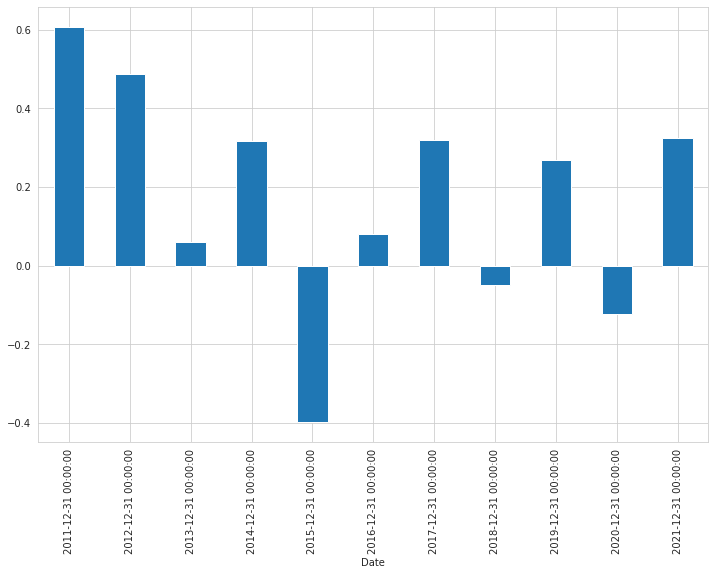

In [761]:
#import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.0, 8.0)

df_yearly = df.pct_change()['Adj Close'].resample(rule='A').sum()
df_yearly.plot(kind='bar')

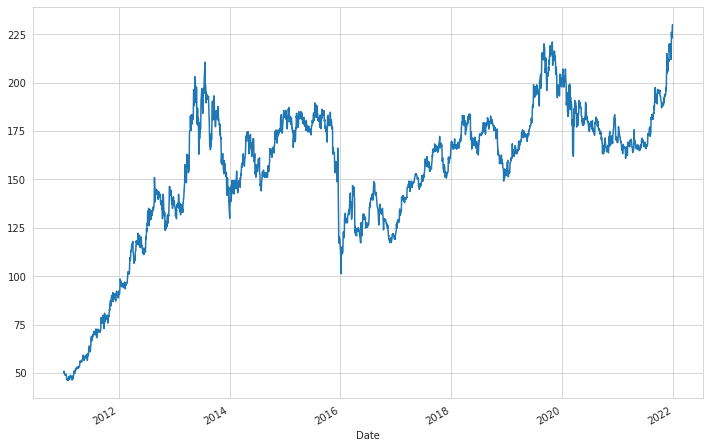

In [762]:
#import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.0, 8.0)
df['Adj Close'].plot()

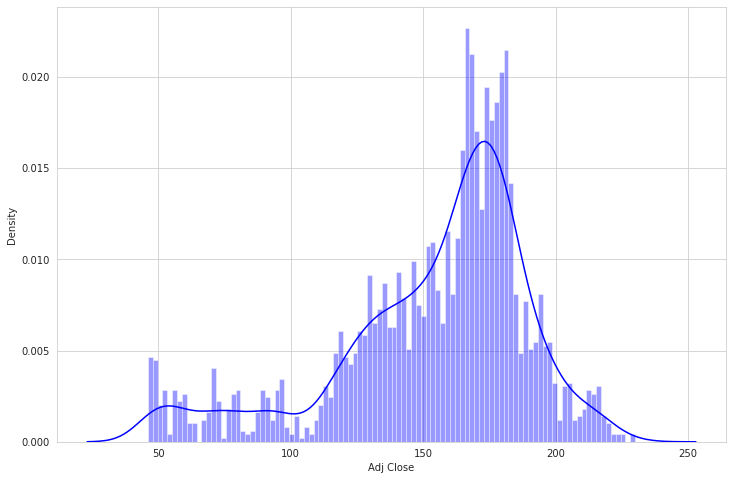

In [763]:
sns.distplot(df['Adj Close'], color = 'blue', bins = 100)

Text(0.6, 0.8, 'Q3: 178.2717%')

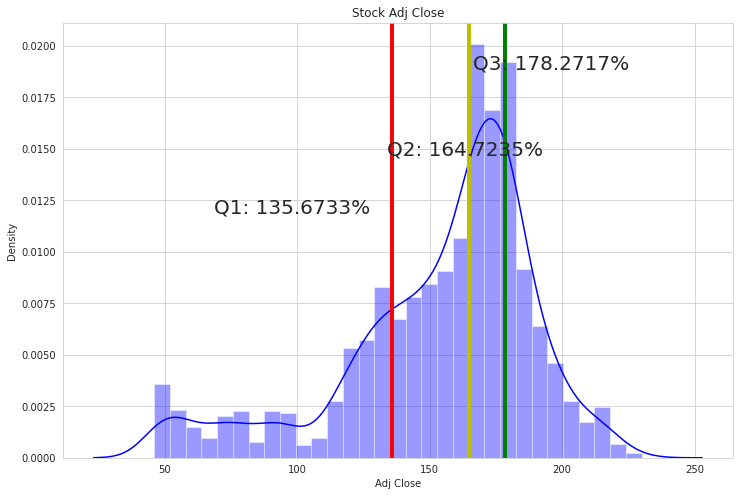

In [764]:
sns.distplot(df['Adj Close'], color='blue')

q1 = df['Adj Close'].quantile(0.25)
q2 = df['Adj Close'].quantile(0.5)
q3 = df['Adj Close'].quantile(0.75)

plt.title("Stock Adj Close")

plt.axvline(x=q1, linewidth=4, color='r')
plt.figtext(0.3, 0.55, "Q1: %.4f" % q1 + "%",fontsize=20)

plt.axvline(x=q2, linewidth=4, color='y')
plt.figtext(0.5, 0.65, "Q2: %.4f" % q2 + "%",fontsize=20)

plt.axvline(x=q3, linewidth=4, color='g')
plt.figtext(0.6, 0.8, "Q3: %.4f" % q3 + "%",fontsize=20)

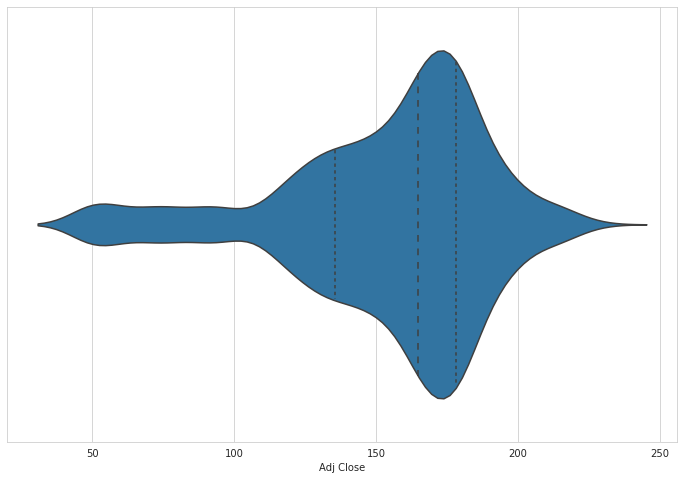

In [765]:
from scipy import stats
sns.violinplot(df['Adj Close'],inner="quartile")

((array([-3.47188302, -3.2261924 , -3.09021736, ...,  3.09021736,
          3.2261924 ,  3.47188302]),
  array([ 46.0260582 ,  46.31736374,  46.31736374, ..., 226.        ,
         229.        , 230.        ])),
 (35.39192658005974, 153.70954702008936, 0.9550711731896102))

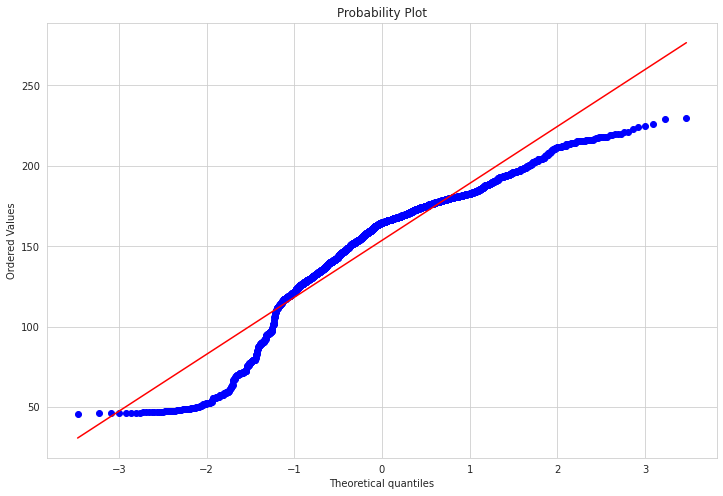

In [766]:
stats.probplot(df['Adj Close'], dist="norm", plot=plt)

In [767]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-04,85.50,87.50,85.00,86.00,50.104332,5691700
2011-01-05,86.50,87.50,86.50,87.25,50.832588,4366500
2011-01-06,87.00,87.25,86.25,87.25,50.832588,3562200
2011-01-07,86.75,86.75,85.25,86.00,50.104332,3651300
2011-01-10,85.50,85.75,84.00,84.75,49.376045,3966900
...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,2762800
2021-12-27,224.00,226.00,222.00,223.00,223.000000,2884100
2021-12-28,224.00,229.00,223.00,225.00,225.000000,5460600


In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2682 entries, 2011-01-04 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2682 non-null   float64
 1   High       2682 non-null   float64
 2   Low        2682 non-null   float64
 3   Close      2682 non-null   float64
 4   Adj Close  2682 non-null   float64
 5   Volume     2682 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 146.7 KB


## **Technical Indicator**

In [769]:
df['Mom'] = ta.MOM(df['Adj Close'], 10)
df['EMA'] = ta.EMA(df['Adj Close'], 10)
df = df.dropna()
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,Mom,EMA
Date,,,,,,,,
2011-01-18,84.50,85.00,84.25,84.75,49.376045,2630300,-0.728287,49.626316
2011-01-19,84.75,85.00,84.00,84.25,49.084755,4100600,-1.747833,49.527850
2011-01-20,84.25,84.75,83.75,84.25,49.084755,7053700,-1.747833,49.447288
2011-01-21,83.75,84.25,82.50,83.75,48.793453,5203700,-1.310879,49.328409
2011-01-24,83.50,83.50,78.25,79.75,46.463017,8147500,-2.913029,48.807428
2011-01-25,80.75,81.50,78.00,81.00,47.191280,5982300,-2.039131,48.513583
2011-01-26,81.75,81.75,78.75,80.00,46.608673,6305000,-2.330425,48.167236
2011-01-27,80.50,80.75,79.75,80.50,46.899967,2515600,-2.039131,47.936823
2011-01-28,79.50,80.25,78.50,80.25,46.754322,3061100,-2.476089,47.721823


In [770]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2672 entries, 2011-01-18 to 2021-12-30
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2672 non-null   float64
 1   High       2672 non-null   float64
 2   Low        2672 non-null   float64
 3   Close      2672 non-null   float64
 4   Adj Close  2672 non-null   float64
 5   Volume     2672 non-null   int64  
 6   Mom        2672 non-null   float64
 7   EMA        2672 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 187.9 KB


In [771]:
stock = df.copy()
stock

,Open,High,Low,Close,Adj Close,Volume,Mom,EMA
Date,,,,,,,,
2011-01-18,84.50,85.00,84.25,84.75,49.376045,2630300,-0.728287,49.626316
2011-01-19,84.75,85.00,84.00,84.25,49.084755,4100600,-1.747833,49.527850
2011-01-20,84.25,84.75,83.75,84.25,49.084755,7053700,-1.747833,49.447288
2011-01-21,83.75,84.25,82.50,83.75,48.793453,5203700,-1.310879,49.328409
2011-01-24,83.50,83.50,78.25,79.75,46.463017,8147500,-2.913029,48.807428
...,...,...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,2762800,8.000000,218.835480
2021-12-27,224.00,226.00,222.00,223.00,223.000000,2884100,6.000000,219.592665
2021-12-28,224.00,229.00,223.00,225.00,225.000000,5460600,6.000000,220.575817


# **Basic Time Series Analysis**

## Daily Return

In [772]:
today_price = stock[['Adj Close']]
daily_return = np.log(today_price/today_price.shift(1))

In [773]:
daily_return

,Adj Close
Date,
2011-01-18,NaN
2011-01-19,-0.005917
2011-01-20,0.000000
2011-01-21,-0.005952
2011-01-24,-0.048939
...,...
2021-12-24,-0.008889
2021-12-27,-0.004474
2021-12-28,0.008929


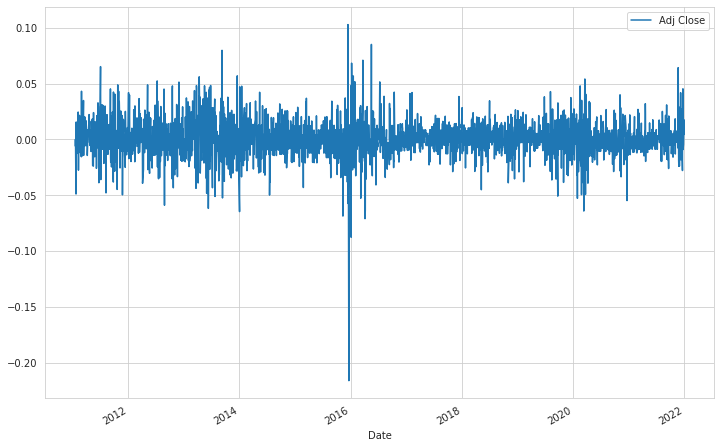

In [774]:
mpl.rcParams['figure.figsize'] = (12.0, 8.0)
daily_return.plot()

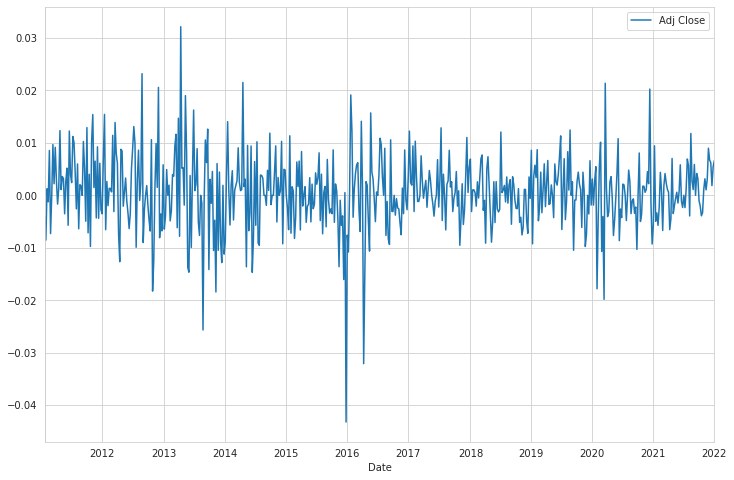

In [775]:
weekly_return =  daily_return.resample('W').mean()
weekly_return.plot()

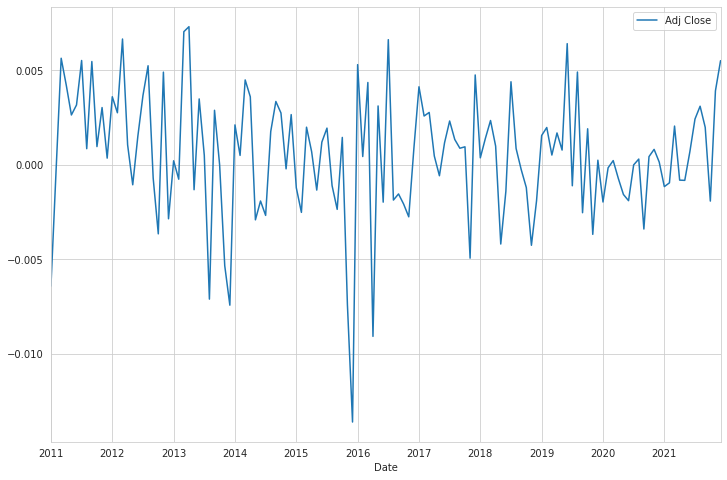

In [776]:
monthly_return =  daily_return.resample('M').mean()
monthly_return.plot()

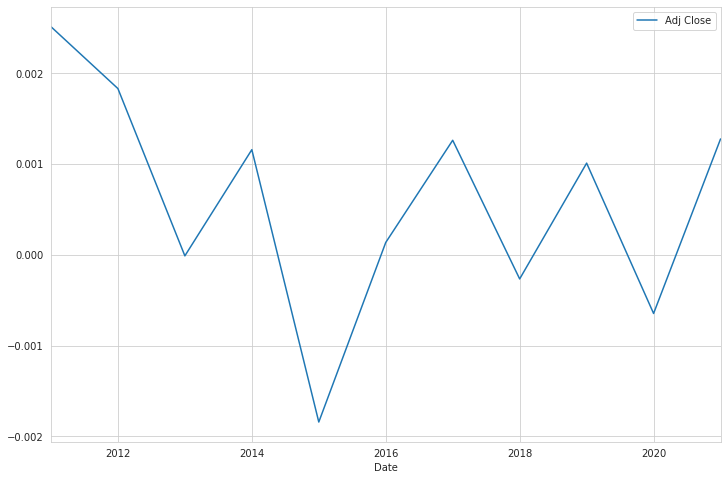

In [777]:
yearly_return =  daily_return.resample('Y').mean()
yearly_return.plot()

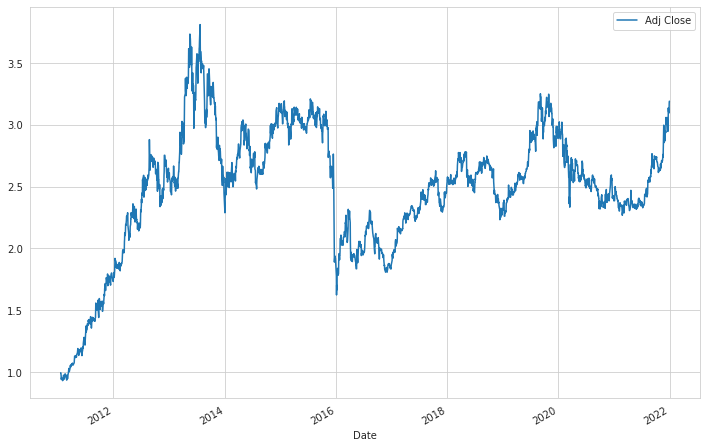

In [778]:
# Cumulative daily Return
cum_daily_return = (1 + daily_return).cumprod()
cum_daily_return.plot()

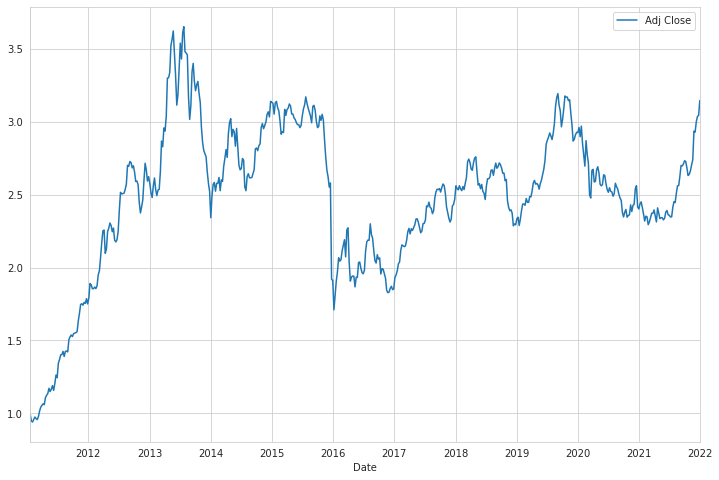

In [779]:
# Cumulative Weekly Return
cum_weekly_return = cum_daily_return.resample('W').mean()
cum_weekly_return.plot()

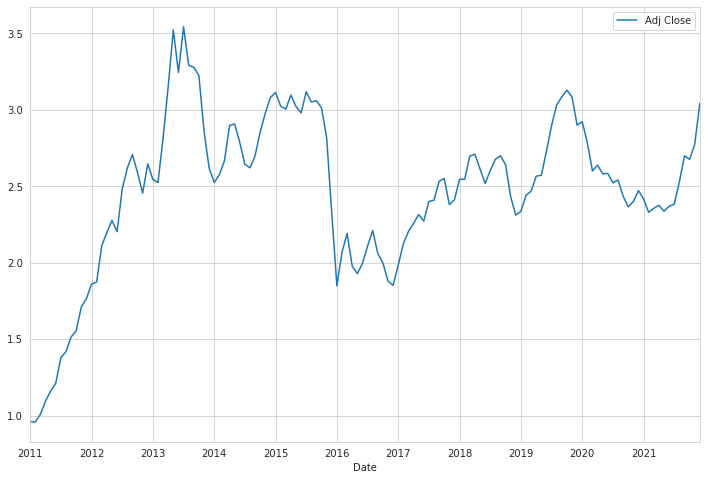

In [780]:
# Cumulative Monthly Return
cum_Monthly_return = cum_daily_return.resample('M').mean()
cum_Monthly_return.plot()

# **Feature Preparation**  

In [781]:
stock

,Open,High,Low,Close,Adj Close,Volume,Mom,EMA
Date,,,,,,,,
2011-01-18,84.50,85.00,84.25,84.75,49.376045,2630300,-0.728287,49.626316
2011-01-19,84.75,85.00,84.00,84.25,49.084755,4100600,-1.747833,49.527850
2011-01-20,84.25,84.75,83.75,84.25,49.084755,7053700,-1.747833,49.447288
2011-01-21,83.75,84.25,82.50,83.75,48.793453,5203700,-1.310879,49.328409
2011-01-24,83.50,83.50,78.25,79.75,46.463017,8147500,-2.913029,48.807428
...,...,...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,2762800,8.000000,218.835480
2021-12-27,224.00,226.00,222.00,223.00,223.000000,2884100,6.000000,219.592665
2021-12-28,224.00,229.00,223.00,225.00,225.000000,5460600,6.000000,220.575817


## **Sliding Windown**

In [782]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True) : 
  n_F = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
  for i in range(n_in-1, -1, -1) :
    cols.append(df.shift(i))
    names += [('F%d(t-%d)' % (j+1, i)) for j in range(n_F)]
  for i in range(1, n_out+1) :
    cols.append(df.shift(-i))
    names += [('F%d(t+%d)' % (j+1, i)) for j in range(n_F)]

  agg = pd.concat(cols, axis = 1)
  agg.columns = names
  if dropnan:
    agg.dropna(inplace = True)
  
  return agg


In [783]:
data = series_to_supervised(data = stock[['Adj Close']], n_in = 1, n_out = 1, dropnan = True) 
data

,F1(t-0),F1(t+1)
Date,,
2011-01-18,49.376045,49.084755
2011-01-19,49.084755,49.084755
2011-01-20,49.084755,48.793453
2011-01-21,48.793453,46.463017
2011-01-24,46.463017,47.191280
...,...,...
2021-12-23,226.000000,224.000000
2021-12-24,224.000000,223.000000
2021-12-27,223.000000,225.000000


## **Univariat Input**

In [784]:
data_win_5 = series_to_supervised(data = stock[['Adj Close']], n_in = 5, n_out = 1, dropnan = True) 
data_win_5

,F1(t-4),F1(t-3),F1(t-2),F1(t-1),F1(t-0),F1(t+1)
Date,,,,,,
2011-01-24,49.376045,49.084755,49.084755,48.793453,46.463017,47.191280
2011-01-25,49.084755,49.084755,48.793453,46.463017,47.191280,46.608673
2011-01-26,49.084755,48.793453,46.463017,47.191280,46.608673,46.899967
2011-01-27,48.793453,46.463017,47.191280,46.608673,46.899967,46.754322
2011-01-28,46.463017,47.191280,46.608673,46.899967,46.754322,46.608673
...,...,...,...,...,...,...
2021-12-23,218.000000,212.000000,218.000000,216.000000,226.000000,224.000000
2021-12-24,212.000000,218.000000,216.000000,226.000000,224.000000,223.000000
2021-12-27,218.000000,216.000000,226.000000,224.000000,223.000000,225.000000


## **Multivariat input**

In [785]:
data_win_mul5 = series_to_supervised(data = stock[['Mom','EMA','Adj Close']], n_in = 5, n_out = 1, dropnan = True) 
data_win_mul5

,F1(t-4),F2(t-4),F3(t-4),F1(t-3),F2(t-3),F3(t-3),F1(t-2),F2(t-2),F3(t-2),F1(t-1),F2(t-1),F3(t-1),F1(t-0),F2(t-0),F3(t-0),F1(t+1),F2(t+1),F3(t+1)
Date,,,,,,,,,,,,,,,,,,
2011-01-24,-0.728287,49.626316,49.376045,-1.747833,49.527850,49.084755,-1.747833,49.447288,49.084755,-1.310879,49.328409,48.793453,-2.913029,48.807428,46.463017,-2.039131,48.513583,47.191280
2011-01-25,-1.747833,49.527850,49.084755,-1.747833,49.447288,49.084755,-1.310879,49.328409,48.793453,-2.913029,48.807428,46.463017,-2.039131,48.513583,47.191280,-2.330425,48.167236,46.608673
2011-01-26,-1.747833,49.447288,49.084755,-1.310879,49.328409,48.793453,-2.913029,48.807428,46.463017,-2.039131,48.513583,47.191280,-2.330425,48.167236,46.608673,-2.039131,47.936823,46.899967
2011-01-27,-1.310879,49.328409,48.793453,-2.913029,48.807428,46.463017,-2.039131,48.513583,47.191280,-2.330425,48.167236,46.608673,-2.039131,47.936823,46.899967,-2.476089,47.721823,46.754322
2011-01-28,-2.913029,48.807428,46.463017,-2.039131,48.513583,47.191280,-2.330425,48.167236,46.608673,-2.039131,47.936823,46.899967,-2.476089,47.721823,46.754322,-2.621738,47.519432,46.608673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,7.000000,216.054749,218.000000,0.000000,215.317522,212.000000,6.000000,215.805245,218.000000,5.000000,215.840655,216.000000,6.000000,217.687809,226.000000,8.000000,218.835480,224.000000
2021-12-24,0.000000,215.317522,212.000000,6.000000,215.805245,218.000000,5.000000,215.840655,216.000000,6.000000,217.687809,226.000000,8.000000,218.835480,224.000000,6.000000,219.592665,223.000000
2021-12-27,6.000000,215.805245,218.000000,5.000000,215.840655,216.000000,6.000000,217.687809,226.000000,8.000000,218.835480,224.000000,6.000000,219.592665,223.000000,6.000000,220.575817,225.000000


In [786]:
data_win_mul5.drop(columns=['F1(t+1)',	'F2(t+1)'], inplace=True)
data_win_mul5

,F1(t-4),F2(t-4),F3(t-4),F1(t-3),F2(t-3),F3(t-3),F1(t-2),F2(t-2),F3(t-2),F1(t-1),F2(t-1),F3(t-1),F1(t-0),F2(t-0),F3(t-0),F3(t+1)
Date,,,,,,,,,,,,,,,,
2011-01-24,-0.728287,49.626316,49.376045,-1.747833,49.527850,49.084755,-1.747833,49.447288,49.084755,-1.310879,49.328409,48.793453,-2.913029,48.807428,46.463017,47.191280
2011-01-25,-1.747833,49.527850,49.084755,-1.747833,49.447288,49.084755,-1.310879,49.328409,48.793453,-2.913029,48.807428,46.463017,-2.039131,48.513583,47.191280,46.608673
2011-01-26,-1.747833,49.447288,49.084755,-1.310879,49.328409,48.793453,-2.913029,48.807428,46.463017,-2.039131,48.513583,47.191280,-2.330425,48.167236,46.608673,46.899967
2011-01-27,-1.310879,49.328409,48.793453,-2.913029,48.807428,46.463017,-2.039131,48.513583,47.191280,-2.330425,48.167236,46.608673,-2.039131,47.936823,46.899967,46.754322
2011-01-28,-2.913029,48.807428,46.463017,-2.039131,48.513583,47.191280,-2.330425,48.167236,46.608673,-2.039131,47.936823,46.899967,-2.476089,47.721823,46.754322,46.608673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,7.000000,216.054749,218.000000,0.000000,215.317522,212.000000,6.000000,215.805245,218.000000,5.000000,215.840655,216.000000,6.000000,217.687809,226.000000,224.000000
2021-12-24,0.000000,215.317522,212.000000,6.000000,215.805245,218.000000,5.000000,215.840655,216.000000,6.000000,217.687809,226.000000,8.000000,218.835480,224.000000,223.000000
2021-12-27,6.000000,215.805245,218.000000,5.000000,215.840655,216.000000,6.000000,217.687809,226.000000,8.000000,218.835480,224.000000,6.000000,219.592665,223.000000,225.000000


In [787]:
data = data_win_5.copy()
#data = data_win_mul5.copy()
data

,F1(t-4),F1(t-3),F1(t-2),F1(t-1),F1(t-0),F1(t+1)
Date,,,,,,
2011-01-24,49.376045,49.084755,49.084755,48.793453,46.463017,47.191280
2011-01-25,49.084755,49.084755,48.793453,46.463017,47.191280,46.608673
2011-01-26,49.084755,48.793453,46.463017,47.191280,46.608673,46.899967
2011-01-27,48.793453,46.463017,47.191280,46.608673,46.899967,46.754322
2011-01-28,46.463017,47.191280,46.608673,46.899967,46.754322,46.608673
...,...,...,...,...,...,...
2021-12-23,218.000000,212.000000,218.000000,216.000000,226.000000,224.000000
2021-12-24,212.000000,218.000000,216.000000,226.000000,224.000000,223.000000
2021-12-27,218.000000,216.000000,226.000000,224.000000,223.000000,225.000000


In [788]:
data.shape[1]

6

In [789]:
from sklearn.preprocessing import  MinMaxScaler

In [790]:
scaler = MinMaxScaler()

In [791]:
scaler.fit(data)

MinMaxScaler()

In [792]:
data_scaled = scaler.transform(data)

## **Train Test Split**

In [793]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data_scaled[:, 0:data_scaled.shape[1]-1], 
                                                     data_scaled[:, data_scaled.shape[1]-1: ],test_size=0.3, random_state=1 ) 



In [794]:
X_train.shape, X_test.shape

((1866, 5), (801, 5))

In [795]:
y_train.shape, y_test.shape

((1866, 1), (801, 1))

# **Model**

In [796]:
X_train.shape[1]

5

In [797]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Activation 
#from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dropout(0.2)) 
 
model.add(Dense(16, activation='relu', ))
model.add(Dropout(0.2))

model.add(Dense(1)) # 

In [798]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 32)                192       
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dropout_21 (Dropout)        (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [799]:
model.output_shape

(None, 1)

In [800]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 5),
    'dtype': 'float32',
    'name': 'dense_29_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 5),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_29',
    'trainable': True,
    'units': 32,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_20',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None

In [801]:
model.compile(loss='mse', optimizer='adam', metrics = ['mae'])

In [802]:
import time

In [803]:
start_time = time.time()
history = model.fit(X_train, y_train,epochs=500, batch_size=32, verbose=0, validation_split=0.5)
end_time = time.time()
print('Training time= ', end_time - start_time)

Training time=  64.38873815536499


In [804]:
test_score, test_error = model.evaluate(X_test, y_test, batch_size=32, verbose= 2)

26/26 - 0s - loss: 3.6297e-04 - mae: 0.0143 - 49ms/epoch - 2ms/step


In [805]:
print('Test Score(MSE) %.4f' % test_score) 
print('Test Error(MAE) %.4f' % test_error)

Test Score(MSE) 0.0004
Test Error(MAE) 0.0143


In [806]:
df_hist = pd.DataFrame.from_dict(history.history)
history.params
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

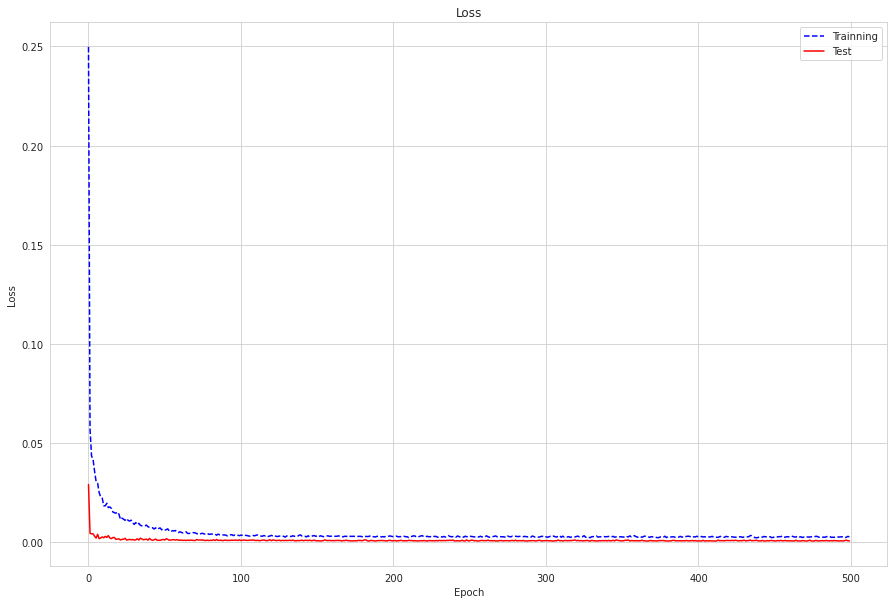

In [807]:
plt.figure(figsize=(15, 10))

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss')
plt.show()

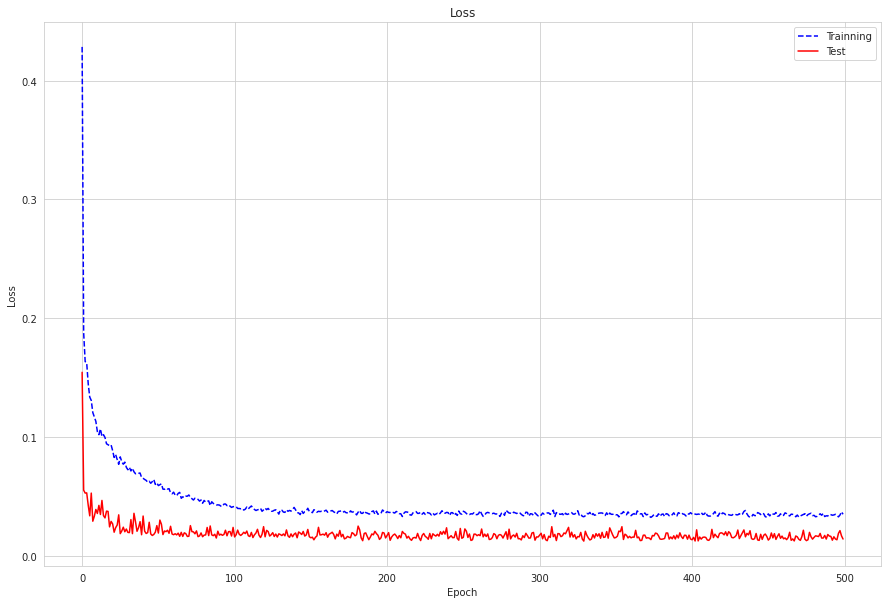

In [808]:
plt.figure(figsize=(15, 10))

df_hist['mae'].plot(style='b--', label='Trainning')
df_hist['val_mae'].plot(style='r-', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss')
plt.show()

In [809]:
y_pred = model.predict(X_test)
#y_pred


In [810]:
y_pred[2]


array([0.6527902], dtype=float32)

In [811]:
y_test[2]

array([0.65321282])

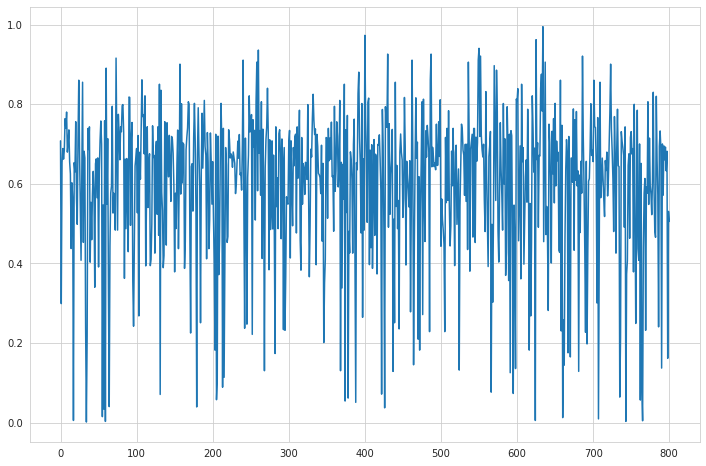

In [812]:
plt.plot(y_test)

In [813]:
data_scaled.shape

(2667, 6)

In [839]:
data_scaled.shape[0]

2667

In [814]:
y_test.shape

(801, 1)

In [815]:
y_pred.shape

(801, 1)

In [846]:
dummy_test = data_scaled[1866:, : ]
dummy_test.shape

(801, 6)

In [842]:
dummy_test = data_scaled[data_scaled.shape[0]-y_test.shape[0]:, : ]

In [843]:
dummy_test.shape

(801, 6)

In [847]:
back2org_test = scaler.inverse_transform(dummy_test)

In [848]:
y_org_test = back2org_test[:,-1]


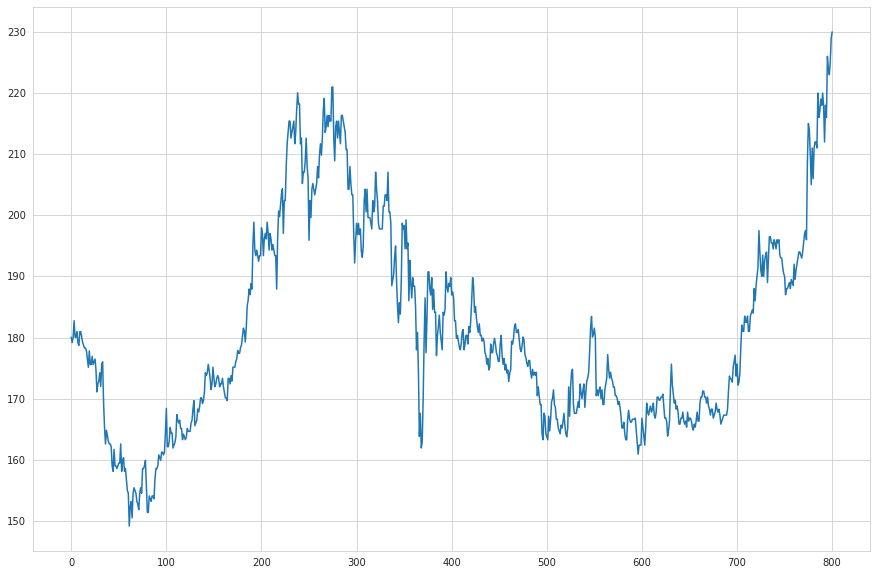

In [849]:
plt.plot(y_org_test)

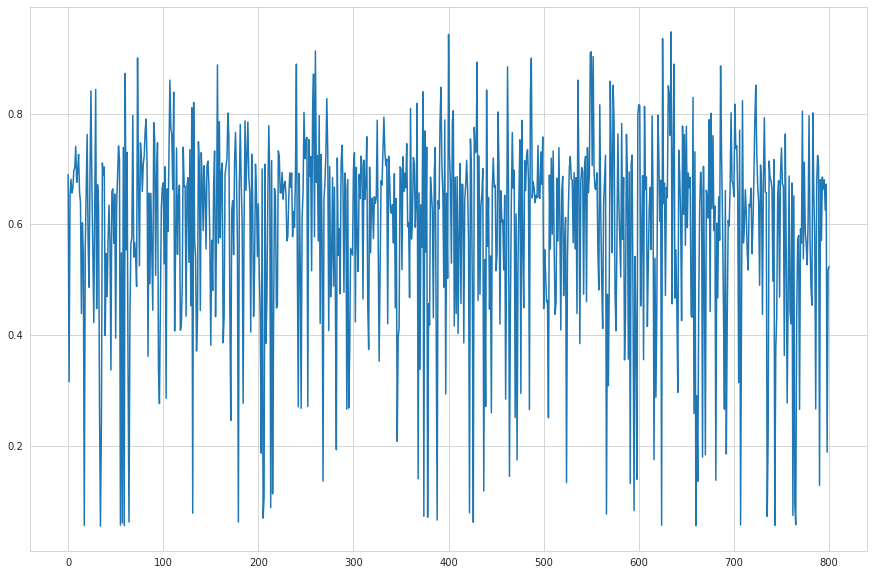

In [850]:
plt.plot(y_pred)

In [853]:
y_pred.shape

(801, 1)

In [852]:
dummy_pred = data_scaled[data_scaled.shape[0]-y_pred.shape[0]: , : ]

In [854]:
back2org_pred = scaler.inverse_transform(dummy_pred)

In [855]:
y_org_pred = back2org_pred[:, -1]

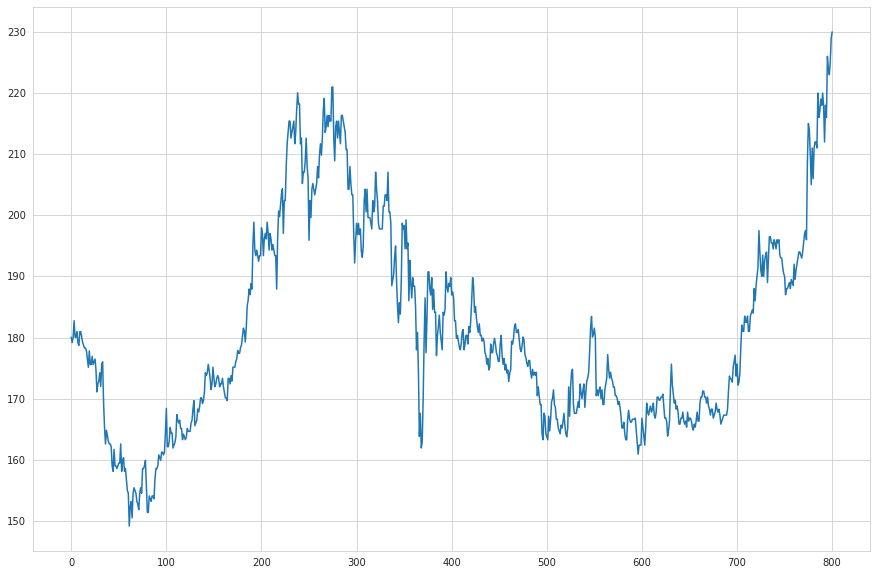

In [856]:
plt.plot(y_org_pred)

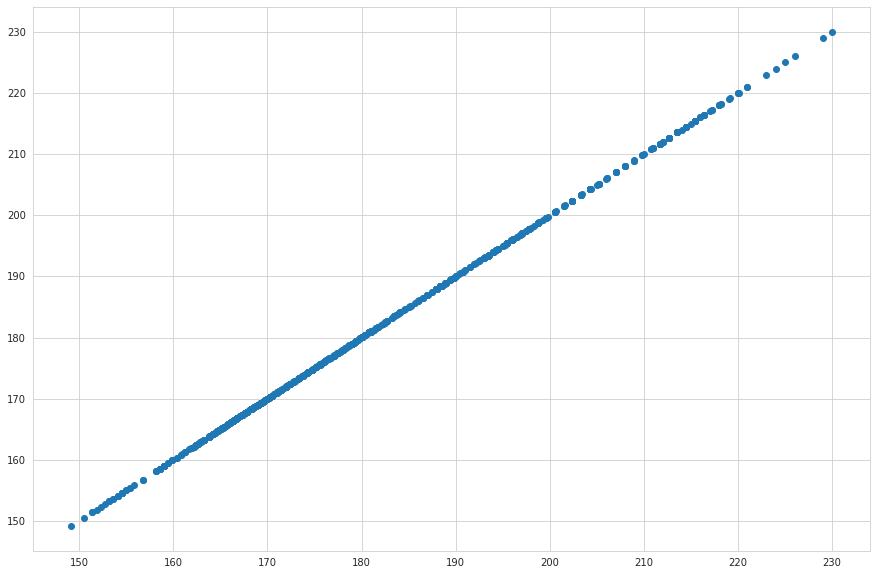

In [857]:
plt.scatter(y_org_test , y_org_pred)

In [858]:
test = pd.Series(y_org_test)
test


0      180.064301
1      179.168442
2      180.064301
3      182.751816
4      180.064301
          ...    
796    224.000000
797    223.000000
798    225.000000
799    229.000000
800    230.000000
Length: 801, dtype: float64

In [859]:
predict = pd.Series(y_org_pred)
predict 

0      180.064301
1      179.168442
2      180.064301
3      182.751816
4      180.064301
          ...    
796    224.000000
797    223.000000
798    225.000000
799    229.000000
800    230.000000
Length: 801, dtype: float64

In [860]:
datas = list(zip(y_org_test,y_org_pred))
cols = ['Test', 'Predict']
dT = pd.DataFrame(datas, columns = cols)

In [861]:
dT

,Test,Predict
0,180.064301,180.064301
1,179.168442,179.168442
2,180.064301,180.064301
3,182.751816,182.751816
4,180.064301,180.064301
...,...,...
796,224.000000,224.000000
797,223.000000,223.000000
798,225.000000,225.000000
799,229.000000,229.000000


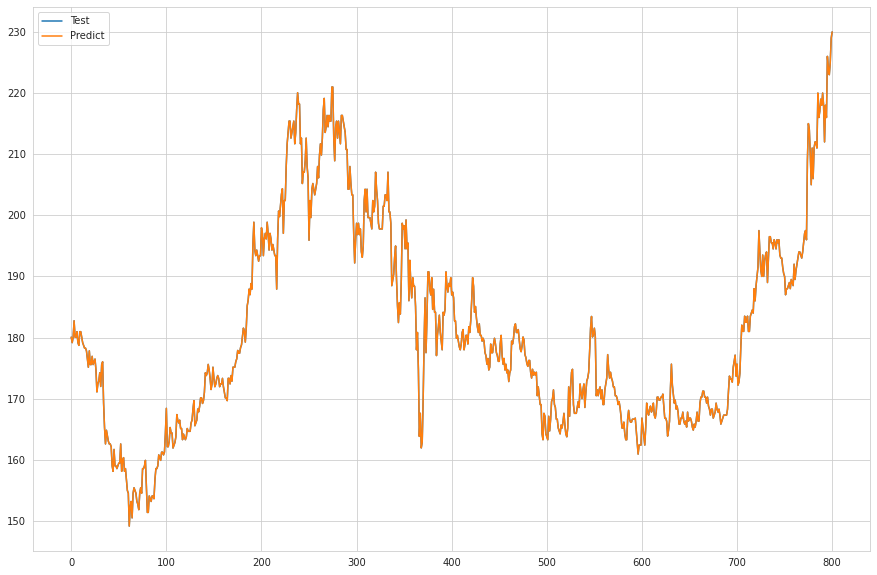

In [862]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 10.0)

dT[['Test','Predict']].plot()